# Costumers Segmentation of E-Commerce Company

## Data Variables Summary

In [1]:
# Column Name              Description
# CustomerID               Unique idetifier for each Customer
# Item Code                Unique id for each product
# InvoieNo                 Unique id for each purchase
# Date of purchase         Date on which the purchase was made
# Quantity                 Number of items bought for each product
# Time                     Time at which the purchase was made
# price per Unit           Price of single unit of item purchased
# Price                    total purchase price
# Shipping Location        Dilivery Loaction
# Cancelled_status         Status of Cancellation
# Reason of return         Reason for return of product
# Sold as set              Was the product sold with another product/ Offer


## Import Important Packages 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
df = pd.read_excel('E-com_Data.xlsx')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


## Understand the problem and objectives

In [4]:
df.shape

(537979, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 41.0+ MB


In [6]:
df['CustomerID'].nunique()

4349

In [7]:
df['CustomerID'].value_counts()

4043.0    7971
1896.0    5874
1301.0    5099
331.0     4615
1675.0    2779
          ... 
2927.0       1
3352.0       1
3666.0       1
4155.0       1
521.0        1
Name: CustomerID, Length: 4349, dtype: int64

In [8]:
df['Item Code'].nunique()

4009

## Data Cleaning (Missing Data Treatment)

In [9]:
# Chacking duplicate entries 
df.duplicated().sum()

9

In [10]:
# Drop 9 duplicate entries 
df.drop_duplicates(inplace = True)

In [11]:
# Checking null values 
df.isnull().sum()

CustomerID           133789
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529625
Reason of return     537967
Sold as set          537970
dtype: int64

In [12]:
df.drop(['Cancelled_status','Reason of return','Sold as set',], inplace = True, axis = 1)

#### 1. Removed Cancelled Status, Reason of return and sold as set becouse they have more than 5 lakhs null values. 


In [13]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


In [14]:
df.isnull().sum()

CustomerID           133789
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
dtype: int64

In [15]:
# Drop 133789 rows becouse customer ID should have unique values.
df.dropna(inplace=True)
df.shape

(404181, 9)

In [16]:
# Change variables name
df = df.rename(columns={'CustomerID': 'customer_id','Item Code': 'itemcode', 'InvoieNo': 'invoie_no',
                       'Date of purchase': 'purchase_date', 'price per Unit': 'unit', 'Shipping Location': 'location' })

In [17]:
df.reset_index(inplace=True)

## EDA

In [18]:
df.head()

,index,customer_id,itemcode,invoie_no,purchase_date,Quantity,Time,unit,Price,location
0,0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


In [19]:
# We will see how many different products were sold in the year data was collected.
print(len(df['itemcode'].value_counts()))

3659


In [20]:
# We will see how many different transanctions were done.
print(len(df['invoie_no'].value_counts()))

21591


In [21]:
# We will see how many different Customers are there.
print(len(df['customer_id'].value_counts()))

4349


In [22]:
pd.DataFrame({'products':len(df['itemcode'].value_counts()),
              'transanctions':len(df['invoie_no'].value_counts()),
              'Customers':len(df['customer_id'].value_counts())},
             index = ['Quantity'])

,products,transanctions,Customers
Quantity,3659,21591,4349


#### There are 21k transanctions but only 4k customers with 3.5k products. It seems that some orders were placed then cancelled or the customers bought items multiple times or multiple items were bought in a single transanction.

In [23]:
# Checking the number of items bought in a single transanctions 
df1 = df.groupby(['customer_id', 'invoie_no'], as_index=False)['purchase_date'].count()
df1 = df.rename(columns = {'purchase_date':'Number of products'})
df1[:10].sort_values('customer_id')

,index,customer_id,itemcode,invoie_no,Number of products,Quantity,Time,unit,Price,location
7,7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1
8,8,4341.0,85014A,377109,2017-05-12,3,09:22:00,692.0,2076.0,Location 1
9,9,4341.0,85014B,390217,2017-09-07,6,14:47:00,670.0,4020.0,Location 1
6,6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1
5,5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1
1,1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1
0,0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1


In [24]:
df['day'] = df['purchase_date'].dt.day
df['month'] = df['purchase_date'].dt.month
df['year'] = df['purchase_date'].dt.year

In [25]:
df.head()

,index,customer_id,itemcode,invoie_no,purchase_date,Quantity,Time,unit,Price,location,day,month,year
0,0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,29,10,2017
1,1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,5,10,2017
2,2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,12,10,2017
3,3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,22,8,2017
4,4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,10,10,2017


In [26]:
df.reset_index()

,level_0,index,customer_id,itemcode,invoie_no,purchase_date,Quantity,Time,unit,Price,location,day,month,year
0,0,0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,29,10,2017
1,1,1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,5,10,2017
2,2,2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,12,10,2017
3,3,3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,22,8,2017
4,4,4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,10,10,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404176,404176,537945,37.0,14693,402292,2017-11-28,1,12:07:00,384.0,384.0,Location 8,28,11,2017
404177,404177,537946,37.0,14693,402292,2017-11-27,1,12:07:00,398.0,398.0,Location 8,27,11,2017
404178,404178,537947,21.0,77618,363890,2016-12-21,8,12:58:00,308.0,2464.0,Location 8,21,12,2016
404179,404179,537948,21.0,85194L,363890,2016-12-21,36,12:58:00,113.0,4068.0,Location 8,21,12,2016


### Monthly Key Performance Indicator

In [27]:
# 1. Price - Generate Monthly KPIs DataFrame by aggregating Price
m_kpis = pd.DataFrame(df.groupby([df.year,df.month])['Price'].sum())

# # 3. Generate Active Customers
m_kpis['active_customers'] = pd.DataFrame(df.groupby([df.year,df.month])['customer_id'].nunique())

# # 4. Generate Monthly Order Count (Quantity)
m_kpis['monthly_order'] = pd.DataFrame(df.groupby([df.year,df.month])['Quantity'].sum())

# # 5. Gengerate Monthly Order Average
m_kpis['monthly_order_average'] =  pd.DataFrame(df.groupby([df.year,df.month])['Price'].mean())

# # Rename index to capture Year and Month
m_kpis.index.set_names(['Year', 'Month'], inplace = True)
m_kpis

Price  active_customers  monthly_order  \
Year Month                                                 
2016 12      64003525.0               939         282091   
2017 1       46415279.0               741         210253   
     2       52974501.0               952         240374   
     3       64923965.0              1125         299831   
     4       63934201.0              1141         312469   
     5       76816719.0              1138         343330   
     6       68317148.0              1183         321041   
     7       69557337.0              1151         336359   
     8       80769506.0              1126         393157   
     9       92627531.1              1419         433097   
     10     121093532.0              1718         563514   
     11     135017599.0              1887         612405   
     12      63549504.0              1172         291539   

            monthly_order_average  
Year Month                         
2016 12               2407.867462  
2017 1                2655.336327  
     2                2613.185724  
     3                2466.622279  
     4                2436.052620  
     5                2774.268446  
     6                2554.771624  
     7                2572.386723  
     8                2856.872736  
     9                2642.574777  
     10               2412.125652  
     11               2161.180635  
     12               2131.675299

In [28]:
# top 5 Monthly quantity 
m_kpis.sort_values(by = 'monthly_order', ascending= False).head(5)

Price  active_customers  monthly_order  \
Year Month                                                 
2017 11     135017599.0              1887         612405   
     10     121093532.0              1718         563514   
     9       92627531.1              1419         433097   
     8       80769506.0              1126         393157   
     5       76816719.0              1138         343330   

            monthly_order_average  
Year Month                         
2017 11               2161.180635  
     10               2412.125652  
     9                2642.574777  
     8                2856.872736  
     5                2774.268446

In [29]:
# top 5 Monthly active customers 
m_kpis.sort_values(by = 'active_customers', ascending= False).head(5)

Price  active_customers  monthly_order  \
Year Month                                                 
2017 11     135017599.0              1887         612405   
     10     121093532.0              1718         563514   
     9       92627531.1              1419         433097   
     6       68317148.0              1183         321041   
     12      63549504.0              1172         291539   

            monthly_order_average  
Year Month                         
2017 11               2161.180635  
     10               2412.125652  
     9                2642.574777  
     6                2554.771624  
     12               2131.675299

In [30]:
# top 5 Monthly price
m_kpis.sort_values(by = 'Price', ascending= False).head(5)

Price  active_customers  monthly_order  \
Year Month                                                 
2017 11     135017599.0              1887         612405   
     10     121093532.0              1718         563514   
     9       92627531.1              1419         433097   
     8       80769506.0              1126         393157   
     5       76816719.0              1138         343330   

            monthly_order_average  
Year Month                         
2017 11               2161.180635  
     10               2412.125652  
     9                2642.574777  
     8                2856.872736  
     5                2774.268446

In [31]:
m_kpis.shape

(13, 4)

In [32]:
# Coustomer id's who has purchased maximum Qantity
df.groupby(['customer_id']).Quantity.agg([len, min, max]).sort_values(by='max',ascending=False).head()

,len,min,max
customer_id,,,
1678.0,3,720,3186
1305.0,34,1,2160
1006.0,571,-96,1600
1119.0,5,100,1500
557.0,469,-32,1440


In [33]:
# Top 5 Coustomers id's who has purchased minimum Qantity
df.groupby(['customer_id']).Quantity.agg([len, min, max]).sort_values(by='min',ascending=True).head()

,len,min,max
customer_id,,,
2994.0,100,-152,240
1433.0,226,-120,120
4080.0,80,-108,200
3366.0,79,-108,100
1676.0,80,-100,720


In [34]:
# Top 5 Coustomers id's who has purchased maximum times 
df.groupby(['customer_id']).Quantity.agg([len, min, max]).sort_values(by='len',ascending=False).head()

,len,min,max
customer_id,,,
4043.0,7970,-10,288
1896.0,5874,-48,640
1301.0,5099,-1,108
331.0,4615,-48,576
1675.0,2779,-38,96


In [35]:
# Top 5 most purchase Invoice no. 
df.groupby(['Price']).invoie_no.agg([max]).sort_values(by='Price',ascending=False).head()


,max
Price,
90400.0,384267
90052.0,382189
90000.0,370929
89840.0,364062
89400.0,406521


In [36]:
# Top 5 minimum purchase Invoice no. 
df.groupby(['Price']).invoie_no.agg([min]).sort_values(by='Price',ascending=True).head()


,min
Price,
-10152.0,383780
-10104.0,395049
-10100.0,397398
-10080.0,364351
-10062.0,395895


In [37]:
# Top 5 hightest price products. 
df.sort_values(by='Price',ascending=False).head()

,index,customer_id,itemcode,invoie_no,purchase_date,Quantity,Time,unit,Price,location,day,month,year
64448,72492,3964.0,39989,384267,2017-07-08,200,10:43:00,452.0,90400.0,Location 36,8,7,2017
81961,90006,3759.0,15143,382189,2017-06-21,188,18:40:00,479.0,90052.0,Location 36,21,6,2017
180015,188062,2538.0,85099B,370929,2017-03-14,400,14:17:00,225.0,90000.0,Location 36,14,3,2017
220687,228734,2000.0,14846,364062,2016-12-19,80,12:08:00,1123.0,89840.0,Location 36,19,12,2016
36982,45024,4234.0,15965,406521,2017-12-11,120,18:43:00,745.0,89400.0,Location 36,11,12,2017


In [38]:
# Top 5 lowest price products. 
df.sort_values(by='Price',ascending=False).tail()


,index,customer_id,itemcode,invoie_no,purchase_date,Quantity,Time,unit,Price,location,day,month,year
68998,77042,3910.0,77595,364351,2016-12-23,-80,16:24:00,126.0,-10080.0,Location 36,23,12,2016
159281,167327,2799.0,77367,395056,2017-10-16,-48,20:18:00,210.0,-10080.0,Location 36,16,10,2017
4394,5128,1676.0,14778,397398,2017-11-01,-100,10:25:00,101.0,-10100.0,Location 11,1,11,2017
204106,212153,2233.0,15464,395049,2017-10-12,-24,19:51:00,421.0,-10104.0,Location 36,12,10,2017
3118,3852,4080.0,8682,383780,2017-07-11,-108,13:22:00,94.0,-10152.0,Location 11,11,7,2017


## Monthly KPI Visualization 

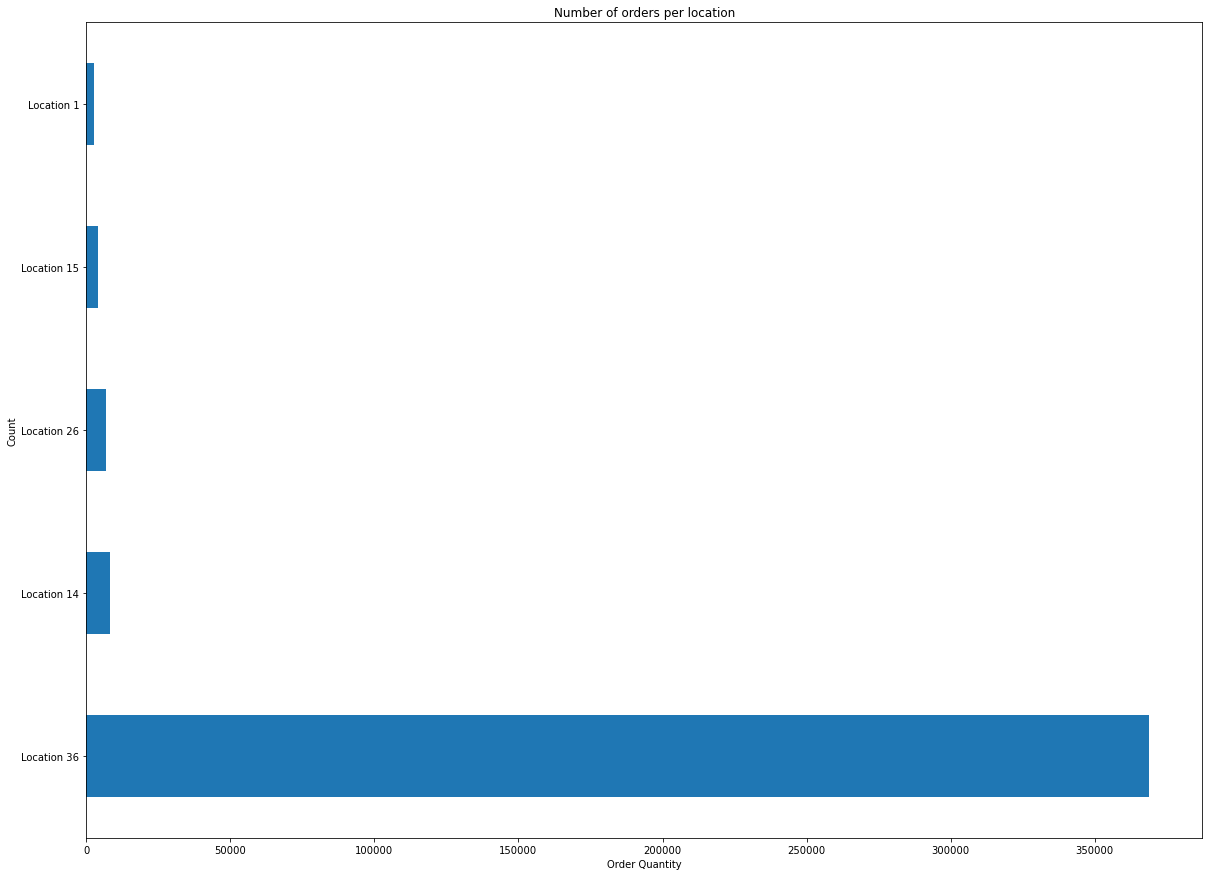

In [65]:
# Review which location do the orders come from
plt.figure(figsize=(20,15))
df.location.value_counts()[0:5].plot(kind='barh');
plt.title('Number of orders per location')
plt.xlabel('Order Quantity');
plt.ylabel('Count');

<AxesSubplot:xlabel='Year,Month'>

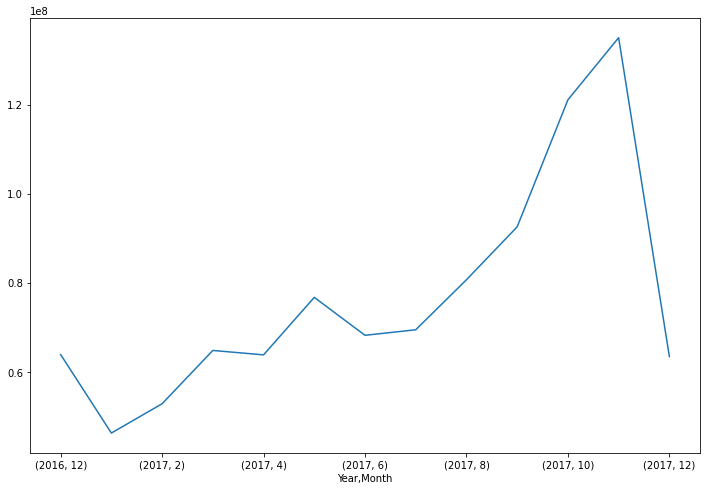

In [40]:
# Line Graph to capture the monthly Price
plt.figure(figsize=(12,8))
m_kpis['Price'].plot.line()

<AxesSubplot:ylabel='Year,Month'>

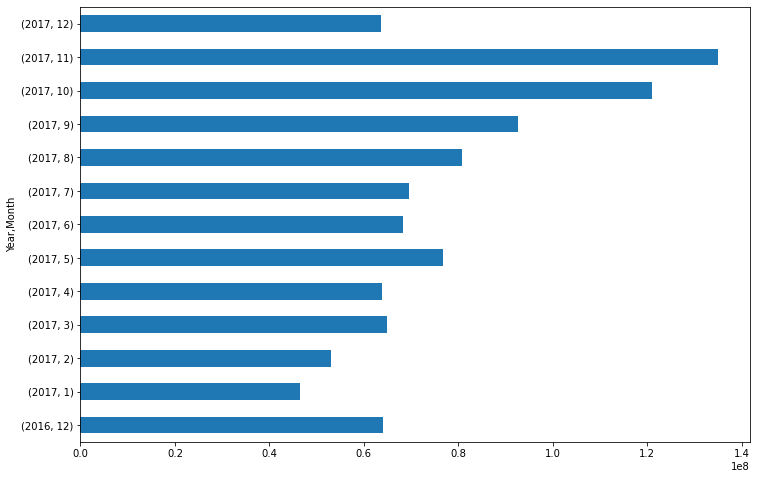

In [41]:
# Monthly average order
plt.figure(figsize=(12,8))
m_kpis['Price'].plot.barh()


<AxesSubplot:xlabel='Year,Month'>

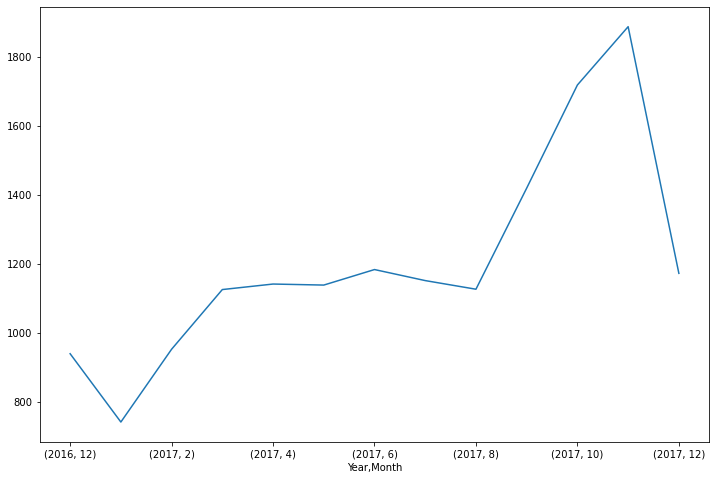

In [42]:
# Line Graph to capture the monthly active customer
plt.figure(figsize=(12,8))
m_kpis['active_customers'].plot.line()

<AxesSubplot:xlabel='Year,Month'>

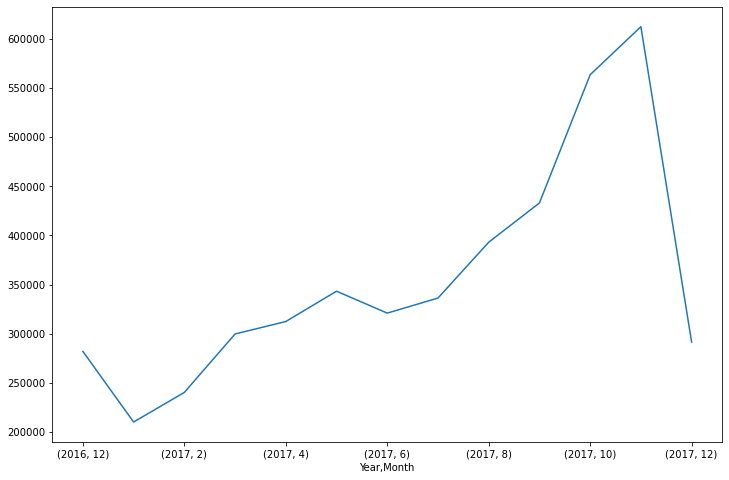

In [43]:
# Line Graph to capture the monthly order
plt.figure(figsize=(12,8))
m_kpis['monthly_order'].plot.line()

## RFM stands for Recency - Frequency - Monetary Value with the following definitions:

#### Recency - Given a current or specific date in the past, when was the last time that the customer made a transaction
#### Frequency - Given a specific time window, how many transactions did the customer do during that window
#### Monetary Value or Revenue - Given a specific window, how much did the customer spend.

## Low value Segment
#### R - Less active
#### F - Not very frequent
#### M - Low spend

## Mid value Segment
#### R - Medium or inconsistent activity
#### F - infrequent or frequent at specific times
#### M - varied spending but overall in the mid of the scale

## High value Segment
#### R - Very active
#### F - Very frequent
#### M - Great spending profile

In [44]:
# Remove the negative values in Quantity column.
df = df[(df['Quantity']>0)]
df.shape

(395998, 13)

In [45]:
# Check unique value for each column.
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
unique_counts(df)

index :  395998
customer_id :  4324
itemcode :  3637
invoie_no :  18305
purchase_date :  381
Quantity :  209
Time :  737
unit :  2570
Price :  10620
location :  20
day :  31
month :  12
year :  2


## RFM Score

In [46]:
# Find out the first and last order dates in the data.
print(df['purchase_date'].min())
print(df['purchase_date'].max())

2016-12-02 00:00:00
2017-12-19 00:00:00


#### Since recency is calculated for a point in time, and the last Purchase date is 2017-12-19, we will use2017-12-20 to calculate recency.

In [47]:
import datetime as dt
now = dt.datetime(2017,12,20)
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

In [48]:
customer_country=df[['location','customer_id']]
customer_country.groupby(['location'])['customer_id'].aggregate('count').reset_index().sort_values('customer_id', ascending=False)

,location,customer_id
15,Location 36,368829
3,Location 14,8124
10,Location 26,6828
4,Location 15,4148
0,Location 1,2859
2,Location 11,2215
16,Location 37,738
9,Location 25,534
6,Location 21,509
5,Location 20,391


In [49]:
rfmTable = df.groupby('customer_id').agg({'purchase_date': lambda x: (now - x.max()).days, 'invoie_no': lambda x: len(x), 'Price': lambda x: x.sum()})
rfmTable['purchase_date'] = rfmTable['purchase_date'].astype(int)
rfmTable.rename(columns={'purchase_date': 'recency', 
                         'invoie_no': 'frequency', 
                         'Price': 'monetary_value'}, inplace=True)
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,77,166972.0


In [50]:
rfmTable = pd.DataFrame(rfmTable)

In [51]:
# Recency Days
rfmTable.sort_values(by='recency',ascending=False).head(1)

,recency,frequency,monetary_value
customer_id,,,
1047.0,381,1,8128.0


In [52]:
# highest Frequency 
rfmTable.sort_values(by='frequency',ascending=False).head(1)

,recency,frequency,monetary_value
customer_id,,,
4043.0,2,7837,5225317.0


In [53]:
# highest Monetry Value 
rfmTable.sort_values(by='monetary_value',ascending=False).head(1)

,recency,frequency,monetary_value
customer_id,,,
1704.0,3,2053,35536194.0


In [54]:
# split metrics into segments is by using quartiles.
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [55]:
# Create a segmented RFM table
segmented_rfm = rfmTable

#### The lowest recency, highest frequency and monetary amounts are our best customers.

In [56]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [57]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
2.0,4,182,553704.0,4,4,4
3.0,77,27,257404.0,2,2,4
4.0,19,72,176613.0,4,3,3
5.0,311,16,41976.0,1,1,2
6.0,37,77,166972.0,3,3,3


In [58]:
# Build RFM Score
def join_rfm(x): 
    return 
segmented_rfm['score'] = segmented_rfm[['r_quartile','f_quartile','m_quartile']].sum(axis=1)
# show 5 samples
segmented_rfm[['r_quartile','f_quartile','m_quartile', 'score']].sample(5)

,r_quartile,f_quartile,m_quartile,score
customer_id,,,,
3880.0,1,1,2,4
2198.0,1,1,1,3
1059.0,3,3,3,9
4162.0,2,4,4,10
550.0,2,1,1,4


In [59]:
# group into different tiers
def get_tier(df):
    if df['score'] >= 9:
        return 'Gold'
    elif (df['score'] >= 5) and (df['score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'
segmented_rfm['tier'] = segmented_rfm.apply(get_tier, axis=1)
segmented_rfm[['r_quartile', 'f_quartile', 'm_quartile', 'score', 'tier']].sample(5)

,r_quartile,f_quartile,m_quartile,score,tier
customer_id,,,,,
3015.0,4,4,4,12,Gold
2762.0,3,4,3,10,Gold
616.0,3,4,4,11,Gold
1033.0,3,3,3,9,Gold
2137.0,4,3,3,10,Gold


In [60]:
# top 5 Best customers!
segmented_rfm.sort_values(by = ['score', 'monetary_value'], ascending = [False, False], na_position = 'first').head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,score,tier
customer_id,,,,,,,,
1704.0,3,2053,35536194.0,4,4,4,12,Gold
1896.0,2,5674,18148261.0,4,4,4,12,Gold
1346.0,10,1384,12657119.0,4,4,4,12,Gold
3802.0,3,963,12367652.0,4,4,4,12,Gold
4234.0,3,322,10654918.0,4,4,4,12,Gold


In [61]:
# top 5 worst customers!
segmented_rfm.sort_values(by = ['score', 'monetary_value'], ascending = [True, True], na_position = 'first').head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,score,tier
customer_id,,,,,,,,
3034.0,212,2,388.0,1,1,1,3,Bronze
3244.0,307,1,501.0,1,1,1,3,Bronze
3209.0,294,1,875.0,1,1,1,3,Bronze
4131.0,250,1,1339.0,1,1,1,3,Bronze
3992.0,266,1,1800.0,1,1,1,3,Bronze


In [62]:
segmented_rfm['tier'].nunique()

3

In [63]:
segmented_rfm['tier'].value_counts()

Silver    1881
Gold      1671
Bronze     772
Name: tier, dtype: int64

<AxesSubplot:xlabel='tier', ylabel='Count'>

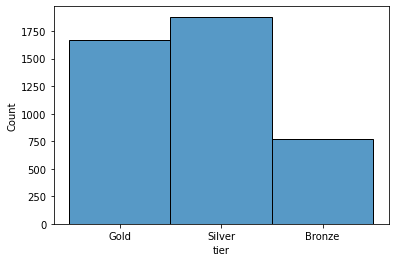

In [64]:
sns.histplot(segmented_rfm['tier'])

## Conclusion

### The work described in this ppt is based on a dataset providing details on purchases made on an E-commerce platform over a period of 13 months. Each entry in the dataset describes the purchase of a product, by a particular customer and at a given date. In total, approximately 4000 clients appear in the dataset. Given the available information, i decided to group customers on the basis of RFM Score, and made 3 categories. The most valuable customers are in Gold Category and leveled down to Silver and Bronze. 

## Insights

### After all the analysis I have come the conclusion that the company has to focus more on the customers who are categorized in Bronze category.
### For the Customers who are categorized in Bronze, the company should provide them exciting offers, discount coupons etc.
### To make the customers in Bronze to attract them for more purchases we can use close marketing strategies.!
### For retaining the Customers in Gold we can provide them Premium account options. 
### Loyalty cards, free trials, cash back offer, random rewards, for silver customers to encourage them to purchase frequently. 
